# *1.* 라이브러리 및 데이터 불러오기

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 60.3 MB/s 
     |████████████████████████████████| 16.7 MB 90.2 MB/s 


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/content/drive/MyDrive/빅콘테스트/NanumBarunGothic.ttf' # 한글폰트 경로
font_name = fm.FontProperties(fname=path, size=10).get_name()
#print(font_name)
#plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 조회 옵션 설정
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 경로 설정
data_path='/content/drive/MyDrive/빅콘테스트/dataset/'
extra_data_path='/content/drive/MyDrive/빅콘테스트/dataset/Extra/'

# 전처리 및 merge한 데이터 불러오기
df = gpd.read_file(data_path+'data_merge_final.geojson')
df.head()

,id,시군구,읍면동,charger_slow_num,charger_slow_amount,charger_fast_num,charger_fast_amount,new_apart_num,new_apart_live,old_apart_num,old_apart_live,small_apart_num,small_apart_live,population_live,road_count,traffic_num,total_car,total_elect_car,height,river_count,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_app_use_count,activity_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,apart_live,total_charger_num,total_charger_amount,No,gas,Nox,ozone,dust,geometry
0,1785,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,443.52682,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.01557 37.35816, 127.01613 ..."
1,1786,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,443.52682,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.01557 37.35771, 127.01614 ..."
2,1787,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,441.09659,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.01557 37.35725, 127.01614 ..."
3,1788,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,441.09659,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.01558 37.35680, 127.01614 ..."
4,1789,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,456.97183,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.01558 37.35635, 127.01614 ..."


In [ ]:
df.dtypes # 변수 형태 확인

id                                            int64
시군구                                          object
읍면동                                          object
charger_slow_num                            float64
charger_slow_amount                         float64
charger_fast_num                            float64
charger_fast_amount                         float64
new_apart_num                               float64
new_apart_live                              float64
old_apart_num                               float64
old_apart_live                              float64
small_apart_num                             float64
small_apart_live                            float64
population_live                             float64
traffic_num                                 float64
total_car                                   float64
total_elect_car                             float64
height                                      float64
river_count                                 float64
parking_lot 

# *2.* 최종 변수 선정

**<변수 삭제 조건 정의>**

- 설명변수별 상관 분석을 통해 다중공선성이 높은 변수를 확인 및 제거하려고 한다.


- 상관관계가 높지 않다고 조회되어도 논리적으로 상관성이 있는 설명변수라면 1개를 선택해준다.

- 같은 데이터에서 여러 변수가 파생되어 나왔을 경우 1개만 선정해준다.

### 2- 1.읍면동으로 상관관계 분석

- 실제 완속 / 급속 충전소가 설치된 격자는 극히 일부이다.

- 따라서 읍면동 단위로 변환해서 상관관계 분석을 진행한다. (가중치 선정시에는 기존 프로젝트와 같이 격자별 충전소 유무를 따진다.)

In [ ]:
# 읍면동 단위로 합계 구하기
df_emd=df.groupby(['읍면동']).sum().reset_index()
df_emd.columns

Index(['읍면동', 'id', 'charger_slow_num', 'charger_slow_amount',
       'charger_fast_num', 'charger_fast_amount', 'new_apart_num',
       'new_apart_live', 'old_apart_num', 'old_apart_live', 'small_apart_num',
       'small_apart_live', 'population_live', 'traffic_num', 'total_car',
       'total_elect_car', 'height', 'river_count', 'parking_lot', '주거',
       'neighborhood', '문화집회', '종교', '판매', '의료', '교육연구', '운동', '업무', '숙박',
       '위락', '주유소', '자동차', '관광휴게', '공업', 'resident_app_use_count',
       'activity_resident_app_use_count', 'activity_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'apart_live',
       'total_charger_num', 'total_charger_amount', 'No', 'gas', 'Nox',
       'ozone', 'dust'],
      dtype='object')

- 읍면동 단위로 합산하였으며 이진 데이터의 경우에는 해당 읍면동에 포함되는 격자의 수가 나오게 된다.

In [ ]:
# 칼럼명 크롭
df_emd_crob=df_emd.iloc[1:,:]
df_emd_crob

,읍면동,id,charger_slow_num,charger_slow_amount,charger_fast_num,charger_fast_amount,new_apart_num,new_apart_live,old_apart_num,old_apart_live,small_apart_num,small_apart_live,population_live,traffic_num,total_car,total_elect_car,height,river_count,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_app_use_count,activity_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,apart_live,total_charger_num,total_charger_amount,No,gas,Nox,ozone,dust
1,고림동,2312781857,37.0,249.0,9.0,650.0,0.0,0.0,8.0,3580.0,2.0,84.0,35383.75,0.000000e+00,12154.000000,227.026409,2.766182e+05,919.0,4,2311,275,1,10,18,5,36,0,26,0,0,9,32,14,610,2013.092576,1576.612519,1803.222627,931.989833,1059.229157,10.0,3664.0,46.0,899.0,1190.26931,7.45093,61.74942,72.02774,1.032697e+05
2,고매동,1040682120,30.0,206.0,2.0,100.0,0.0,0.0,5.0,1174.0,0.0,0.0,37475.75,2.561148e+07,3022.000000,2274.068654,2.336703e+05,1035.0,0,1290,343,8,7,52,0,79,92,21,61,26,28,99,0,303,656.965562,675.462096,1316.967767,345.995060,826.682929,5.0,1174.0,32.0,306.0,1213.72021,7.84404,59.85297,74.03753,9.819040e+04
3,공세동,915851005,155.0,1035.0,3.0,200.0,0.0,0.0,10.0,5392.0,0.0,0.0,24642.25,3.458089e+07,8006.000000,1867.718682,2.009181e+05,636.0,11,838,206,0,0,18,0,190,16,14,0,0,22,39,29,161,1029.411091,904.841039,1394.165255,479.138766,793.770015,10.0,5392.0,158.0,1235.0,1097.34416,6.71700,54.86493,65.01421,8.731700e+04
4,구갈동,766534384,119.0,657.0,1.0,50.0,0.0,0.0,19.0,7984.0,12.0,771.0,15472.75,2.227754e+07,18522.000000,1286.153583,1.629028e+05,434.0,25,1294,151,0,1,78,2,107,52,42,4,0,23,46,0,75,2672.705614,2086.139745,2344.026312,1279.213723,1464.113757,31.0,8755.0,120.0,707.0,819.94394,4.63598,46.15183,48.41962,6.511747e+04
5,김량장동,695528163,51.0,283.0,3.0,150.0,0.0,0.0,10.0,3597.0,9.0,519.0,16321.00,9.036145e+06,9408.000000,50.514828,9.011783e+04,297.0,60,2408,271,10,0,110,6,53,0,85,62,9,4,18,0,3,1371.089780,1291.009102,1482.771922,685.502199,824.735901,19.0,4116.0,54.0,433.0,352.39487,2.36514,20.57917,21.92311,3.268155e+04
6,남동,1809443019,12.0,58.0,3.0,200.0,0.0,0.0,1.0,159.0,0.0,0.0,39979.25,1.533034e+07,3782.000000,170.414964,3.582106e+05,168.0,0,1181,188,6,9,3,0,272,8,2,11,0,12,54,0,124,452.741724,429.536976,536.063449,201.564013,254.139915,1.0,159.0,15.0,258.0,1038.61347,6.78060,57.05457,63.92496,9.287745e+04
7,남사면,13987267356,65.0,389.0,15.0,1300.0,0.0,0.0,5.0,6725.0,0.0,0.0,385795.50,0.000000e+00,13766.000000,1534.895940,1.828468e+06,4724.0,20,4688,964,4,24,110,0,218,14,123,103,13,35,54,1,5459,1564.424460,1587.765962,2825.854071,788.566884,1520.546472,5.0,6725.0,80.0,1689.0,11147.34894,71.43865,528.39737,700.04609,9.656341e+05
8,농서동,274085469,9.0,61.0,1.0,50.0,0.0,0.0,1.0,980.0,0.0,0.0,24573.25,0.000000e+00,2153.000000,883.531592,6.201163e+04,159.0,0,256,95,2,0,4,0,6,7,2,3,0,16,40,0,485,529.160959,661.215230,2041.616414,413.388913,1294.008554,1.0,980.0,10.0,111.0,488.12566,3.14316,23.31830,29.85320,3.838596e+04
9,동백동,1086332310,107.0,649.0,0.0,0.0,0.0,0.0,21.0,10963.0,2.0,188.0,29728.75,3.624845e+07,15532.000000,1576.936132,3.000804e+05,2.0,1,1769,74,0,7,0,0,56,0,0,0,0,1,7,0,8,2526.124242,1811.012906,1965.521519,1085.270045,1175.654912,23.0,11151.0,107.0,649.0,860.78723,4.94397,43.42489,49.84773,6.888218e+04
10,동천동,700943673,166.0,1030.0,0.0,0.0,1.0,293.0,22.0,10414.0,1.0,79.0,54039.75,1.464508e+07,20169.000000,3959.979403,4.085925e+05,986.0,9,2117,300,11,28,18,0,50,6,32,0,9,3,9,0,204,3406.884653,2198.653813,2623.241293,1278.991170,1582.028104,24.0,10786.0,166.0,1030.0,1384.13210,7.30131,70.26016,78.00477,1.032353e+05


In [ ]:
# 칼럼명 크롭 (2)
df_emd_crob= df_emd_crob.iloc[:,2:]
df_emd_crob= df_emd_crob.fillna(0)  # 결측치 처리
df_emd_crob.head()

,charger_slow_num,charger_slow_amount,charger_fast_num,charger_fast_amount,new_apart_num,new_apart_live,old_apart_num,old_apart_live,small_apart_num,small_apart_live,population_live,traffic_num,total_car,total_elect_car,height,river_count,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_app_use_count,activity_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,apart_live,total_charger_num,total_charger_amount,No,gas,Nox,ozone,dust
1,37.0,249.0,9.0,650.0,0.0,0.0,8.0,3580.0,2.0,84.0,35383.75,0.000000e+00,12154.0,227.026409,276618.19792,919.0,4,2311,275,1,10,18,5,36,0,26,0,0,9,32,14,610,2013.092576,1576.612519,1803.222627,931.989833,1059.229157,10.0,3664.0,46.0,899.0,1190.26931,7.45093,61.74942,72.02774,103269.71371
2,30.0,206.0,2.0,100.0,0.0,0.0,5.0,1174.0,0.0,0.0,37475.75,2.561148e+07,3022.0,2274.068654,233670.29247,1035.0,0,1290,343,8,7,52,0,79,92,21,61,26,28,99,0,303,656.965562,675.462096,1316.967767,345.995060,826.682929,5.0,1174.0,32.0,306.0,1213.72021,7.84404,59.85297,74.03753,98190.40224
3,155.0,1035.0,3.0,200.0,0.0,0.0,10.0,5392.0,0.0,0.0,24642.25,3.458089e+07,8006.0,1867.718682,200918.12619,636.0,11,838,206,0,0,18,0,190,16,14,0,0,22,39,29,161,1029.411091,904.841039,1394.165255,479.138766,793.770015,10.0,5392.0,158.0,1235.0,1097.34416,6.71700,54.86493,65.01421,87316.99505
4,119.0,657.0,1.0,50.0,0.0,0.0,19.0,7984.0,12.0,771.0,15472.75,2.227754e+07,18522.0,1286.153583,162902.77799,434.0,25,1294,151,0,1,78,2,107,52,42,4,0,23,46,0,75,2672.705614,2086.139745,2344.026312,1279.213723,1464.113757,31.0,8755.0,120.0,707.0,819.94394,4.63598,46.15183,48.41962,65117.46955
5,51.0,283.0,3.0,150.0,0.0,0.0,10.0,3597.0,9.0,519.0,16321.00,9.036145e+06,9408.0,50.514828,90117.82862,297.0,60,2408,271,10,0,110,6,53,0,85,62,9,4,18,0,3,1371.089780,1291.009102,1482.771922,685.502199,824.735901,19.0,4116.0,54.0,433.0,352.39487,2.36514,20.57917,21.92311,32681.54653


In [ ]:
# 상관관계 확인
df_corr=df_emd_crob.corr()
df_corr

,charger_slow_num,charger_slow_amount,charger_fast_num,charger_fast_amount,new_apart_num,new_apart_live,old_apart_num,old_apart_live,small_apart_num,small_apart_live,population_live,traffic_num,total_car,total_elect_car,height,river_count,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_app_use_count,activity_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,apart_live,total_charger_num,total_charger_amount,No,gas,Nox,ozone,dust
charger_slow_num,1.000000,0.995120,0.283836,0.171464,0.311337,0.301596,0.776637,0.834693,0.107553,0.113682,-0.182296,0.228216,0.799046,0.704659,-0.222862,-0.167487,0.264602,0.017410,-0.147559,-0.102164,-0.144809,0.081573,0.040312,0.099026,-0.097573,0.155627,-0.173755,-0.246154,-0.134126,-0.116627,0.019481,-0.215255,0.774284,0.720563,0.630921,0.730467,0.649244,0.740769,0.838080,0.998170,0.812124,-0.186979,-0.198992,-0.180908,-0.194314,-0.197420
charger_slow_amount,0.995120,1.000000,0.262332,0.151022,0.353513,0.343461,0.736740,0.796420,0.082975,0.090697,-0.185964,0.218008,0.760101,0.705547,-0.228354,-0.168841,0.227827,0.000953,-0.159944,-0.096315,-0.146148,0.052208,0.023458,0.101022,-0.093595,0.123623,-0.172206,-0.239745,-0.150229,-0.130241,0.022583,-0.224549,0.734219,0.682126,0.592924,0.691991,0.610676,0.700109,0.800796,0.992030,0.803283,-0.192123,-0.201978,-0.185161,-0.198701,-0.201845
charger_fast_num,0.283836,0.262332,1.000000,0.963006,-0.079261,-0.053147,0.441395,0.375998,0.214940,0.164489,0.240245,0.237709,0.444652,0.234898,0.155608,0.275315,0.322306,0.354797,0.300577,0.503109,0.046892,0.504667,-0.018217,0.420176,-0.070684,0.431989,0.072690,-0.066568,0.307278,0.102252,0.159267,0.262823,0.493723,0.551647,0.561544,0.518883,0.537881,0.447585,0.375088,0.341303,0.767075,0.253450,0.248493,0.258386,0.247797,0.245905
charger_fast_amount,0.171464,0.151022,0.963006,1.000000,-0.071186,-0.046575,0.372096,0.295701,0.184969,0.136377,0.239045,0.198916,0.326100,0.189789,0.135180,0.259790,0.270609,0.289952,0.259159,0.396597,0.062531,0.456829,-0.066231,0.369329,-0.059150,0.394449,0.063196,-0.050429,0.288176,0.054067,0.146278,0.244116,0.376985,0.427652,0.440554,0.392813,0.414940,0.378017,0.295038,0.228815,0.710080,0.244288,0.247690,0.250970,0.243288,0.240814
new_apart_num,0.311337,0.353513,-0.079261,-0.071186,1.000000,0.976300,0.140222,0.155150,-0.110776,-0.099984,-0.034004,-0.162981,0.151612,0.564154,-0.033491,-0.015263,-0.116129,-0.014111,-0.049688,-0.055975,0.039110,-0.082234,-0.103717,-0.098163,-0.059447,-0.047256,-0.104823,-0.017632,-0.240328,-0.206708,-0.079772,-0.086244,0.169075,0.127909,0.093923,0.137051,0.101295,0.130131,0.179437,0.300195,0.208914,-0.054623,-0.060648,-0.051504,-0.059036,-0.061263
new_apart_live,0.301596,0.343461,-0.053147,-0.046575,0.976300,1.000000,0.120207,0.142630,-0.108849,-0.101928,-0.032147,-0.163431,0.125406,0.518660,-0.027106,-0.018506,-0.114173,-0.023410,-0.051315,-0.054017,0.011947,-0.064995,-0.093582,-0.080711,-0.054423,-0.044731,-0.092949,-0.049900,-0.222889,-0.190328,-0.071977,-0.081041,0.136284,0.111514,0.077864,0.120636,0.083249,0.111648,0.167688,0.292293,0.216582,-0.049430,-0.054333,-0.046515,-0.053457,-0.055226
old_apart_num,0.776637,0.736740,0.441395,0.372096,0.140222,0.120207,1.000000,0.958727,0.285748,0.305547,-0.211970,0.309752,0.856181,0.637689,-0.238247,-0.191331,0.469842,0.015771,-0.146475,-0.100918,-0.143298,0.195626,0.087845,0.146569,-0.075846,0.219437,-0.132586,-0.215504,-0.113200,-0.072767,0.048774,-0.239070,0.878170,0.822625,0.716180,0.833733,0.742902,0.978861,0.960781,0.789151,0.748964,-0.210660,-0.223515,-0.204703,-0.216889,-0.219938
old_apart_live,0.834693,0.796420,0.375998,0.295701,0.155150,0.142630,0.958727,1.000000,0.181077,0.197363,-0.181219,0.258617,0.880086,0.660704,-0.249697,-0.175361,0.441217,0.026475,-0.154796,-0.106044,-0.161102,0.126747,0.104342,0.117281,-0.101337,0.174277,-0.105267,-0.249840,-0.142541,-0.109038,-0.018787,-0.216642,0.88263

- 논리적으로 유사한 데이터 제거 없이 일단 데이터 전처리에서 구한 모든 변수의 상관성을 확인하였다.

- 해당 상관분석을 토대로 유사 데이터 및 y변수와 상관성이 없는 일부 변수를 삭제하였다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


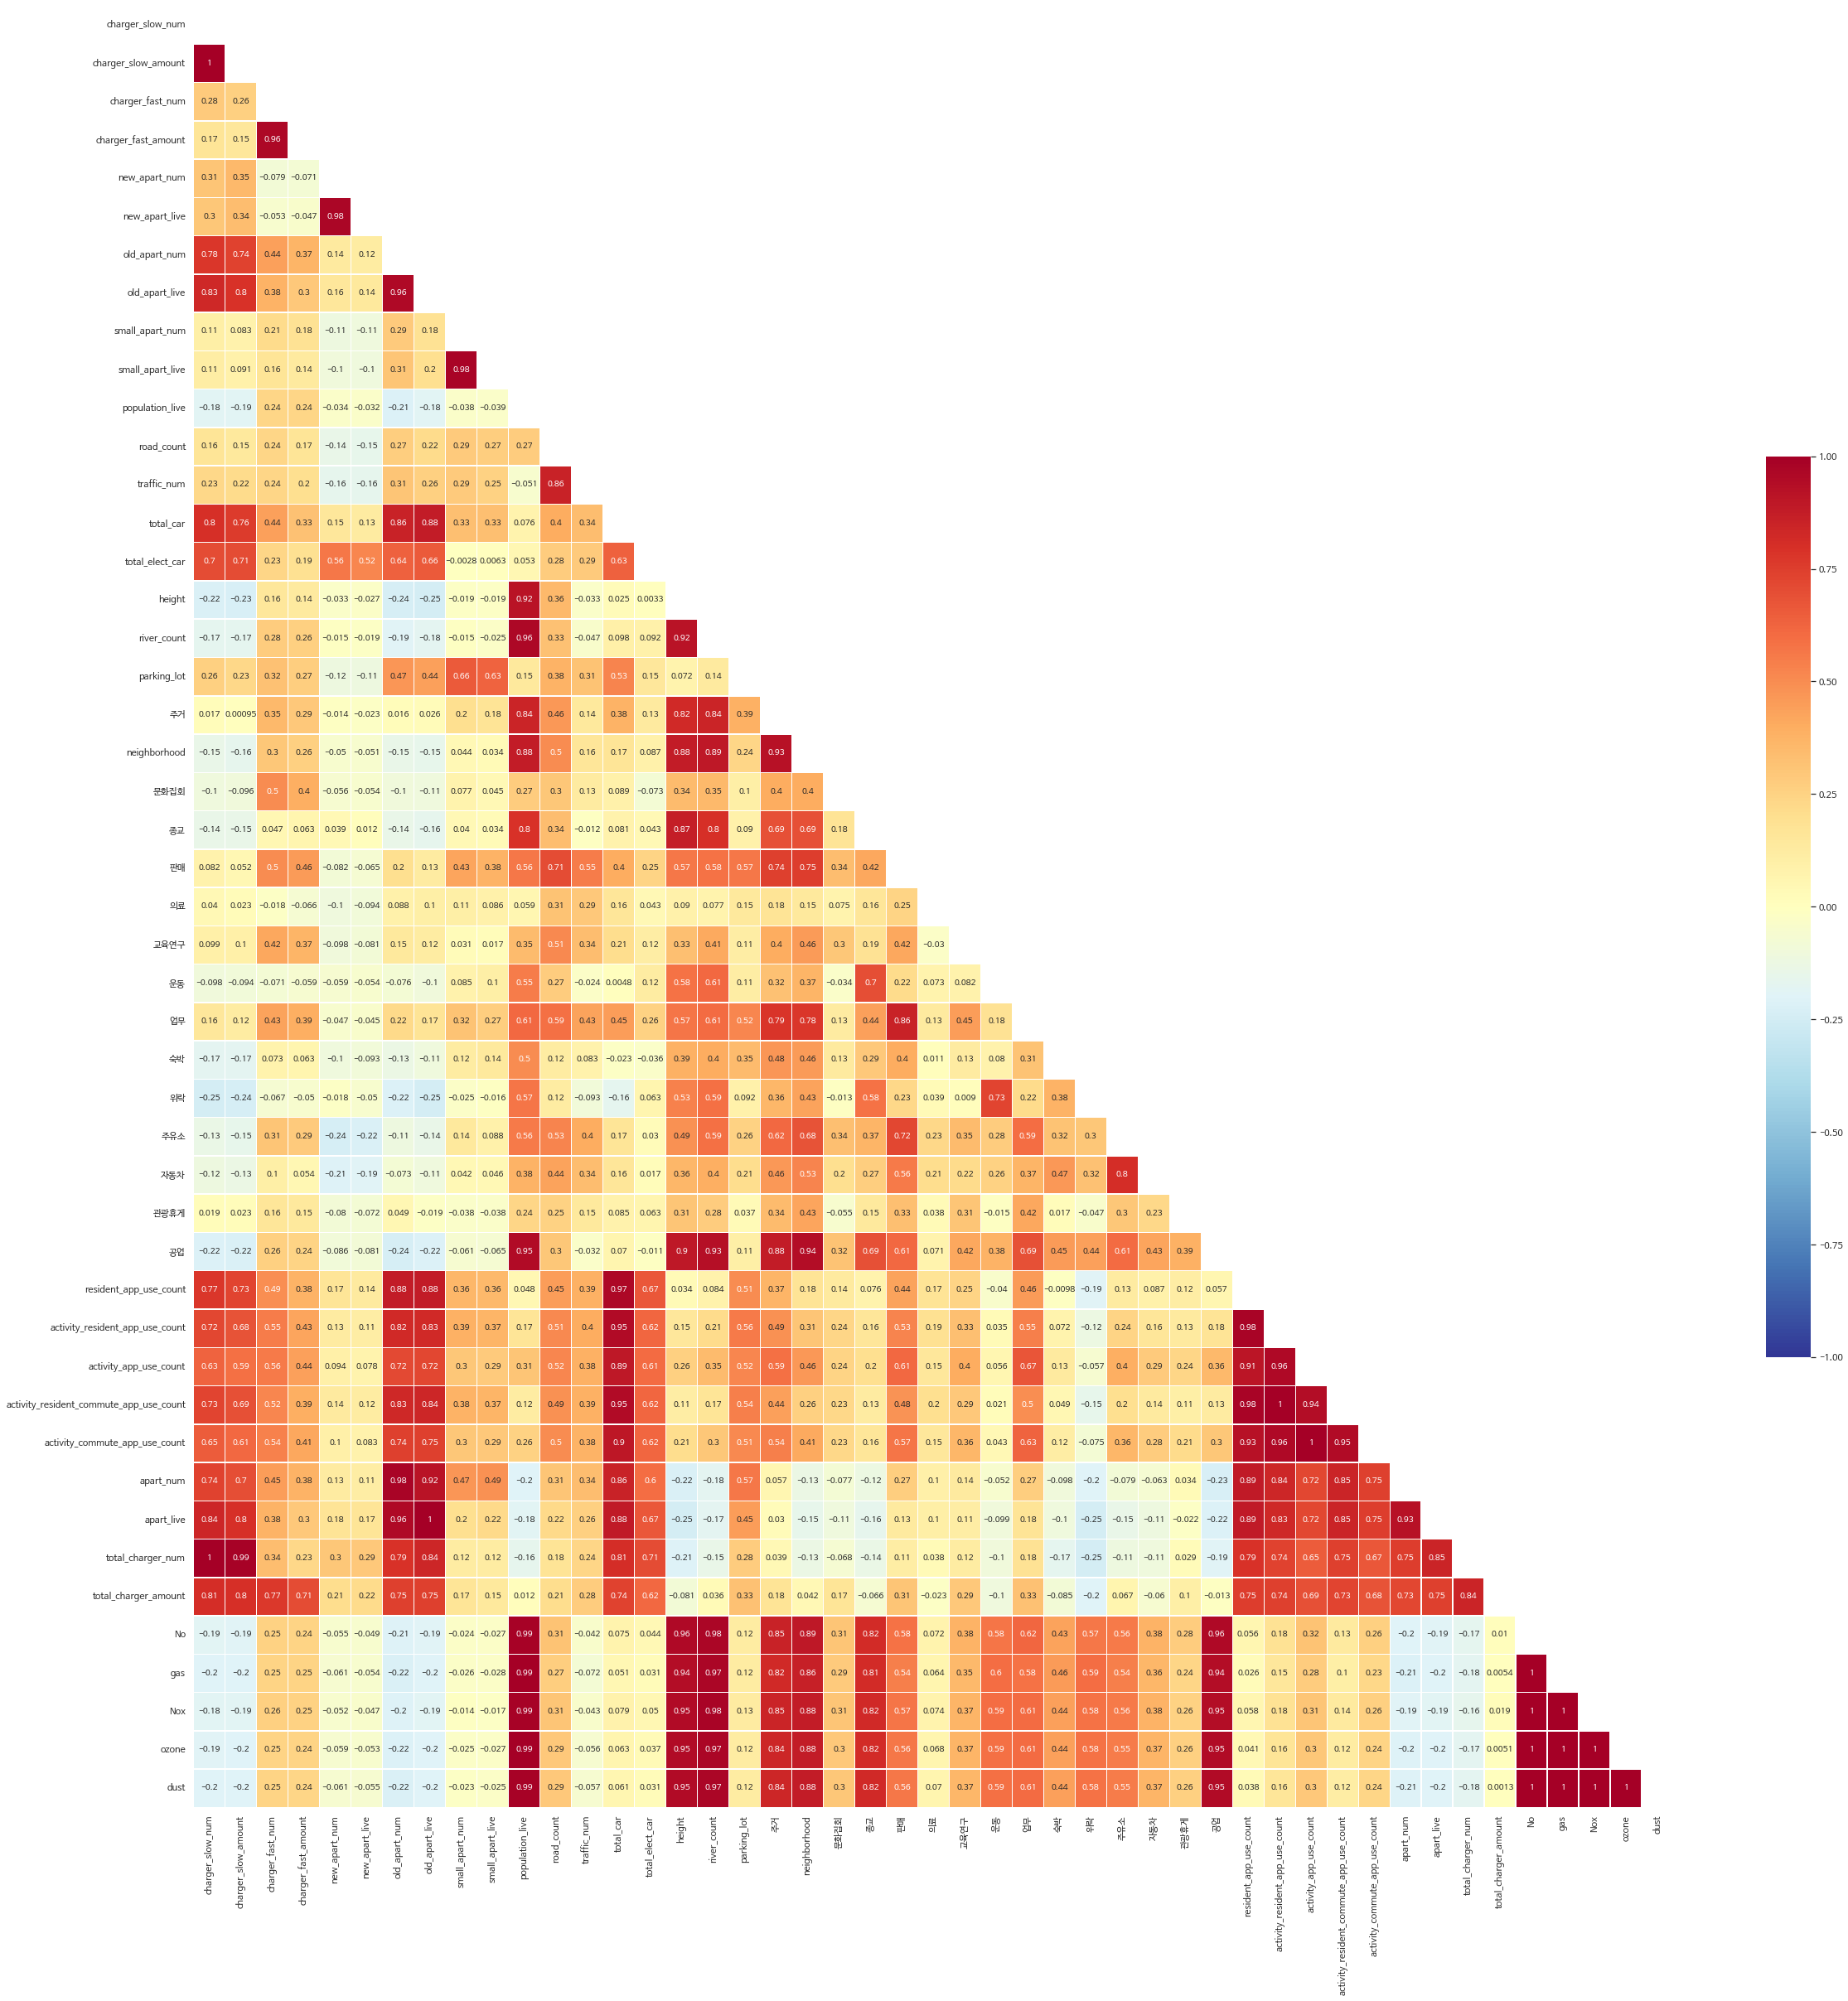

In [ ]:
# 상관관계 히트맵으로 표현

# 크기 지정
fig, ax = plt.subplots( figsize=(40,40) )

# 삼각형 마스크를 만들기
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그리기
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값
            mask=mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()
plt.savefig('/content/drive/MyDrive/빅콘테스트/code/상관분석.png')

## 2-2. 최종 변수 선택 및 보정

### 기본 데이터셋 전처리

In [ ]:
df.columns

Index(['id', '시군구', '읍면동', 'charger_slow_num', 'charger_slow_amount',
       'charger_fast_num', 'charger_fast_amount', 'new_apart_num',
       'new_apart_live', 'old_apart_num', 'old_apart_live', 'small_apart_num',
       'small_apart_live', 'population_live', 'traffic_num', 'total_car',
       'total_elect_car', 'height', 'river_count', 'parking_lot', '주거',
       'neighborhood', '문화집회', '종교', '판매', '의료', '교육연구', '운동', '업무', '숙박',
       '위락', '주유소', '자동차', '관광휴게', '공업', 'resident_app_use_count',
       'activity_resident_app_use_count', 'activity_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'apart_live',
       'total_charger_num', 'total_charger_amount', 'No', 'gas', 'Nox',
       'ozone', 'dust', 'geometry'],
      dtype='object')

In [ ]:
data = df.iloc[:,3:-1]
data= data.fillna(0)  # 결측치 처리
data.head()

,charger_slow_num,charger_slow_amount,charger_fast_num,charger_fast_amount,new_apart_num,new_apart_live,old_apart_num,old_apart_live,small_apart_num,small_apart_live,population_live,traffic_num,total_car,total_elect_car,height,river_count,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_app_use_count,activity_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,apart_live,total_charger_num,total_charger_amount,No,gas,Nox,ozone,dust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443.52682,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443.52682,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,441.09659,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,441.09659,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,456.97183,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.isna().sum()

charger_slow_num                           0
charger_slow_amount                        0
charger_fast_num                           0
charger_fast_amount                        0
new_apart_num                              0
new_apart_live                             0
old_apart_num                              0
old_apart_live                             0
small_apart_num                            0
small_apart_live                           0
population_live                            0
traffic_num                                0
total_car                                  0
total_elect_car                            0
height                                     0
river_count                                0
parking_lot                                0
주거                                         0
neighborhood                               0
문화집회                                       0
종교                                         0
판매                                         0
의료        

### y변수 (chartger_slow_num 변수) 형태 변환

- 충전량과 격자 내 총 개수 (중복있을 경우 모두 계산됨) 를 구했지만 최종적으로는 설치, 미설치 (0,1 의 이진형태) 로 구분하였다.

In [ ]:
# 완속충전소 유무를 표시하는 열 생성
data['slow_charger'] = data['charger_slow_num'].apply(lambda x : 1 if x >= 1 else 0)
data['slow_charger'].value_counts()

0    187224
1       498
Name: slow_charger, dtype: int64

- 508개의 격자에 완속충전소가 설치된 것으로 확인된다.

### 최종 삭제 칼럼 명시

In [ ]:
drop_cols = ['charger_slow_num', 'charger_slow_amount', 'charger_fast_num', 'traffic_num',
       'charger_fast_amount', 'new_apart_num', 'small_apart_num',
       'old_apart_num', 'height', 'river_count','activity_resident_app_use_count',
       'activity_app_use_count', 'apart_live', 'population_live',
       'old_apart_live', 'new_apart_live', 'small_apart_live','total_charger_num', 'total_charger_amount', 'traffic_num']

**< 가중치 선정시 삭제 칼럼 설명>**

- charger_slow_num : 해당 연속형 데이터를 활용해 격자별 완속충전소 설치 유무 (slow_charger, 이진형) 변수를 정의하였으므로 삭제함

- charger_slow_amount, charger_fast_amount : y변수 (slow_charge) 와 유사한 변수로 결과적으로 충전량이 아닌 설치 / 미설치 여부를 따지기로 해서 삭제함

- charger_fast_num : 완속충전소 설치 여부와 급속 충전소 설치 여부는 상관성이 없어서 삭제함. (ex. 급속 충전소와 같이 완속충전소가 자주 설치되는 경향성이 크지도 않으며, 완속충전소가 무조건적으로 급속충전소 멀리 설치되는 것도 아님). 해당 변수는 가중치 요인으로 사용되지 않으나 MCLP 제약조건에는 사용할 예정임

- old_apart_num, new_apart_num, small_apart_num, : 구축, 신축, 100명 이하 아파트의 개수를 각각 구했으나  결과적으로 가중치 요인으로는 모든 아파트 유형을 합산한 변수 (apart_num) 를 사용하기로 함. 다만, MCLP 알고리즘의 결과 설치 최적 장소로 아파트 근처 및 아파트 주차장이 나올 경우 해당 아파트 유형에 맞게 설치 개수를 지정할 예정임

- height: 설치 제한 구역 정의 (저지대 충전소 설치 불가) 를 위해 구한 칼럼으로 상관성이 없음. (ex. 저지대가 아닐 경우 고도의 높고 낮음은 설치 유무와 상관이 없다.)  해당 변수는 가중치 요인으로 사용되지 않으나 MCLP 제약조건에는 사용할 예정임

- rivder_count : 설치 제한 구역 정의 (하천, 저수지 및 인근에 설치 불가) 를 위해 구한 칼럼으로 상관성이 없음. 해당 변수는 가중치 요인으로 사용되지 않으나 MCLP 제약조건에는 사용할 예정임

- activity_resident_app_use_count,activity_app_use_count: activity, activity_resident 데이터의 유동인구별 격자내 앱 사용자수라는 데이터 특성을 고려해 전체 격자내 평균 앱 사용자수가 아니라 특정 시간 (출퇴근 시간이라 가정) 때 격자내 평균 앱 사용자수 (activity_resident_commute_app_use_count,activity_commute_app_use_count) 변수를 사용하기로 함

- old_apart_live, new_apart_live, small_apart_live, apart_live : 아파트별 세대수 데이터는 y변수와 상관성이 높게 나왔지만 총 아파트 개수 (apart_num) 와의 다중공산성이 높다고 판단해서 제거함. 추가로 거주 인구가 아니라 아파트가 밀집된 곳에 설치 여부를 고려하기 위해 모든 종류 아파트 세대수가 아닌 모든 종류 아파트 개수 (apart_num) 를 사용함.

-  total_charger_num, total_charger_amount : 완속충전소 설치 여부와 급속 충전소 설치 여부는 상관성이 없어서 삭제함. (ex. 급속 충전소와 같이 완속충전소가 자주 설치되는 경향성이 크지도 않으며, 완속충전소가 무조건적으로 급속충전소 멀리 설치되는 것도 아님). 또한 완속, 급속 충전소 합산이 아닌 따로 기준을 제시해야 하므로 해당 데이터셋을 삭제함

- traffic_num: 일부 교통량 검지기 기준으로 데이터를 매핑했기 때문에 용인시 전체 도로 대비 교통량이 산출된 도로가 극히 적음. 또한 특정 지점의 교통량을 산출했기 때문에 산출된 교통량 역시 정확도가 떨어짐. 마지막으로 전기차 충전소 설치 지침을 고려했을 때 도로 인근에 설치된 충전소는 비상 충전을 할 수 있는 급속 충전소가 대부분임. 따라서 완속충전기는 급속과 달리 도로 근처에 설치되는 것은 적합하지 않다고 판단하기에 해당 데이터를 제거함

- population_live : population_live는 총 인구 데이터로 대부분의 건물 관련 (공업, 주거 등) 매우 높은 상관성을 보임. 따라서 다중공선성 제거를 위해 해당 변수를 제거함. 추가로 거주 인구 관련 변수로는 resident_app_use_count, 주거 등을 활용하기로 함



In [ ]:
data = data.drop(drop_cols, axis = 1) # 칼럼 삭제 진행
data.head()

,total_car,total_elect_car,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,No,gas,Nox,ozone,dust,slow_charger
0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# *3*. 가중치 부여

- 기존의 충전소는 아파트 개수, 교통량 등 기존 수요에 맞게 잘 설치되었다고 볼 수 있다.

- 따라서, 로지스틱 회귀분석을 진행하고 변수별 가중치를 계산한다.

### 로지스틱 회귀분석 진행

In [ ]:
# TRAIN, TEST 분류
features = data.drop('slow_charger', axis = 1)
labels = data[['slow_charger']]
train_features1, test_features1, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
# 대기질 데이터를 제외한 train_features, test_features 생성 (오류)
train_features=train_features1.drop(['No', 'gas',	'Nox',	'ozone',	'dust'],axis=1)
test_features=test_features1.drop(['No', 'gas',	'Nox',	'ozone',	'dust'],axis=1)

In [ ]:
# 스케일링 (대기질 포함)
scaler = MinMaxScaler()
train_features1 = scaler.fit_transform(train_features1)
test_features1 = scaler.transform(test_features1)

In [ ]:
# 스케일링 (대기질 미포함)
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

< 특이사항>

- TRAIN, TEST 셋을 분리해 로지스틱 회귀 분석을 진행하고 변수별 가중치를 구해주려고 한다. 

- 현재 데이터셋에는 대기질 (Nox, No, dust, gas, ozone) 관련 변수들이 속해있다. 해당 변수들은 기존의 완속 / 급속 충전소 설치 유무와는 상관성이 없으나 대기질 오염 감소에 기여하고자 전기차 완속충전소 설치를 제시하는 우리의 연구주제와 밀접한 연관이 있는 변수이기에 로지스틱 회귀 분석을 통해 가중치를 구하는 것이 아니라 따로 가중치를 부여해주려 한다.

- 그러므로 대기질  (Nox, No, dust, gas, ozone) 관련 변수 5종을 포함한 train_features1, test_features1  와 대기질 변수 5종을 포함하지 않은 train_features, test_features 를 따로 계산해준다.

## 로지스틱 회귀분석 모델 적용 1

In [ ]:
# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(model.score(train_features, train_labels))

0.9973932992875965


In [ ]:
print(model.score(test_features, test_labels))

0.9970808207794422


In [ ]:
y_pred = model.predict(test_features) # 예측

<img src = "https://t1.daumcdn.net/cfile/tistory/99DC064C5BE056CE10" height = 300 width = 500>

In [ ]:
# 결과 해석
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=y_pred)

In [ ]:
conf_matrix

array([[46786,    10],
       [  127,     8]])

< 모형해석>

* Accuracy는 올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값
* Recall은 실제로 True인 데이터를 모델이 True라고 인식한 데이터의 수
* Precision은 모델이 True로 예측한 데이터 중 실제로 True인 데이터이 수
* F1 score는 precision 과 recall의 조화평균

In [ ]:
print('Precision: %.3f' % precision_score(test_labels, y_pred))
print('Recall: %.3f' % recall_score(test_labels, y_pred))
print('F1 Score: %.3f' % f1_score(test_labels, y_pred))
print('Accuracy: %.3f' % accuracy_score(test_labels, y_pred))

Precision: 0.444
Recall: 0.059
F1 Score: 0.105
Accuracy: 0.997


**<결과 해석>**

- 실제 0 LABEL의 수가 매우 많고 예측값도 전부 0으로 되어서 정확도만 높은 결과가 나왔다.

**-> 실제 전기차 충전소가 설치된 곳을 예측하는 것이 중요하므로 Recall값 높이는 방법 적용하기로 한다.**

In [ ]:
print(model.coef_)

[[ 9.04078173e-01  4.48011881e-01 -5.82260896e-01  2.72514119e+00
   5.04032120e-01  1.53019231e-01 -1.18942475e-01  1.00621170e+00
  -7.43658312e-02  1.88979305e+00 -1.33392903e-01  7.89739088e-01
   5.05164196e-01  2.22575801e-01 -8.59705547e-02 -7.88784518e-04
   9.38490107e-01 -6.57638450e-01  6.73561333e+00  2.04594942e+00
   2.19601506e+00  1.32555873e+01]]


## 로지스틱 회귀분석 모델 적용 2 - SMOTE 적용

- recall 값을 높이기 위해 SMOTE 를 적용하였다.

In [ ]:
# SMOTE를 이용한 오버샘플링
sm = SMOTE()
# train데이터를 넣어 복제함
resampled_train_features, resampled_train_labels = sm.fit_resample(train_features,train_labels)
resampled_train_features1, resampled_train_labels1 = sm.fit_resample(train_features1,train_labels)

print('After OverSampling, the shape of train_X: {}'.format(resampled_train_features.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(resampled_train_labels.shape))

print("After OverSampling, counts of label '1': {}".format(len(resampled_train_labels[resampled_train_labels['slow_charger']==1])))
print("After OverSampling, counts of label '0': {}".format(len(resampled_train_labels[resampled_train_labels['slow_charger']==0])))

After OverSampling, the shape of train_X: (280856, 22)
After OverSampling, the shape of train_y: (280856, 1) 

After OverSampling, counts of label '1': 140428
After OverSampling, counts of label '0': 140428


In [ ]:
model2 = LogisticRegression()
model2.fit(resampled_train_features, resampled_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred2 = model2.predict(test_features)

In [ ]:
print('Precision: %.3f' % precision_score(test_labels, y_pred2))
print('Recall: %.3f' % recall_score(test_labels, y_pred2))
print('F1 Score: %.3f' % f1_score(test_labels, y_pred2))
print('Accuracy: %.3f' % accuracy_score(test_labels, y_pred2))

Precision: 0.025
Recall: 0.793
F1 Score: 0.048
Accuracy: 0.910


- Recall값이 상당히 많이 향상된 것을 확인할 수 있다. 

- 반면 accuracy는 일부 감소하였다.

In [ ]:
print(model2.coef_)

[[ 0.56044146  0.97690392 -6.57852783  6.84540649  1.36677881  5.70436401
  -6.0017792   8.96993215 -3.96075681 11.17645936 -7.13190998  5.78217535
   4.23894112 15.83683388 -7.6824899  -2.37441939  7.54160206 -4.64706965
  16.4356451  -4.71740373  9.80130117 23.69340231]]


In [ ]:
data.columns

Index(['total_car', 'total_elect_car', 'parking_lot', '주거', 'neighborhood',
       '문화집회', '종교', '판매', '의료', '교육연구', '운동', '업무', '숙박', '위락', '주유소', '자동차',
       '관광휴게', '공업', 'resident_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'No', 'gas', 'Nox',
       'ozone', 'dust', 'slow_charger'],
      dtype='object')

In [ ]:
for i in range(len(data.iloc[:,:-1].columns)-5):
  print(data.iloc[:,:-6].columns[i], '의 가중치 : ', model2.coef_[0][i])

total_car 의 가중치 :  0.5604414569911209
total_elect_car 의 가중치 :  0.9769039228403962
parking_lot 의 가중치 :  -6.578527831887266
주거 의 가중치 :  6.845406493665238
neighborhood 의 가중치 :  1.3667788125115732
문화집회 의 가중치 :  5.7043640144306735
종교 의 가중치 :  -6.001779197119309
판매 의 가중치 :  8.969932154989616
의료 의 가중치 :  -3.9607568145887577
교육연구 의 가중치 :  11.176459355438281
운동 의 가중치 :  -7.131909984285443
업무 의 가중치 :  5.782175352684499
숙박 의 가중치 :  4.238941118094369
위락 의 가중치 :  15.836833879582022
주유소 의 가중치 :  -7.682489902899775
자동차 의 가중치 :  -2.3744193889025516
관광휴게 의 가중치 :  7.541602055755648
공업 의 가중치 :  -4.647069645859756
resident_app_use_count 의 가중치 :  16.43564510106673
activity_resident_commute_app_use_count 의 가중치 :  -4.7174037302274945
activity_commute_app_use_count 의 가중치 :  9.801301165929939
apart_num 의 가중치 :  23.693402309868947


- 가중치값이 너무 불균형이 심해 총 가중치 합이 1이 되도록 보정한다.

In [ ]:
# 보정된 가중치
for i in range(len(data.iloc[:,:-1].columns)-5):
  print(data.iloc[:,:-6].columns[i], '의 가중치 : ', (model2.coef_[0][i])/(model2.coef_[0].sum()))

total_car 의 가중치 :  0.0073901934195509476
total_elect_car 의 가중치 :  0.01288182530405309
parking_lot 의 가중치 :  -0.08674696078794233
주거 의 가중치 :  0.09026612395028023
neighborhood 의 가중치 :  0.018022863334260286
문화집회 의 가중치 :  0.07521990544471209
종교 의 가중치 :  -0.07914173474295924
판매 의 가중치 :  0.1182809243654381
의료 의 가중치 :  -0.05222804020381231
교육연구 의 가중치 :  0.1473770281482713
운동 의 가중치 :  -0.09404406754215366
업무 의 가중치 :  0.07624595523591977
숙박 의 가중치 :  0.055896283842009294
위락 의 가중치 :  0.20883049257589592
주유소 의 가중치 :  -0.10130422297984285
자동차 의 가중치 :  -0.03130999379904871
관광휴게 의 가중치 :  0.09944642244087286
공업 의 가중치 :  -0.06127802126096431
resident_app_use_count 의 가중치 :  0.2167266442494857
activity_resident_commute_app_use_count 의 가중치 :  -0.06220547314907978
activity_commute_app_use_count 의 가중치 :  0.1292436711737405
apart_num 의 가중치 :  0.3124301809813131


In [ ]:
# 스케일링한 값 정의
scale_df = pd.DataFrame(list(resampled_train_features1))
scale_df.columns = data.iloc[:,:-1].columns

In [ ]:
scale_df.head()

,total_car,total_elect_car,parking_lot,주거,neighborhood,문화집회,종교,판매,의료,교육연구,운동,업무,숙박,위락,주유소,자동차,관광휴게,공업,resident_app_use_count,activity_resident_commute_app_use_count,activity_commute_app_use_count,apart_num,No,gas,Nox,ozone,dust
0,0.000000,0.000000,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.063628,0.293233,0.236317,0.0,0.866397,0.826590,0.900904,0.923298,0.937380
1,0.012685,0.043841,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.831541,0.849711,0.754172,0.941195,0.966340
2,0.045652,0.043841,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.887642,0.780347,0.844924,0.904762,0.939343
3,0.080483,0.043841,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.047619,0.000000,0.000000,0.000000,0.0,0.787117,0.846821,0.850139,0.887184,0.951619
4,0.000000,0.000000,0.0,0.36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.000000,0.000000,0.000000,0.0,0.837014,0.826590,0.819889,0.909556,0.952911


In [ ]:
scale_df.columns

Index(['total_car', 'total_elect_car', 'parking_lot', '주거', 'neighborhood',
       '문화집회', '종교', '판매', '의료', '교육연구', '운동', '업무', '숙박', '위락', '주유소', '자동차',
       '관광휴게', '공업', 'resident_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'No', 'gas', 'Nox',
       'ozone', 'dust'],
      dtype='object')

- 현재 scale_df에는 대기질 변수 5종이 포함되어 있다. 

- 따라서 모든 변수[i] * 해당 변수의 가중치 [i] 를 활용해 'grade' (완속충전소입지점수) 를 계산하였다.

In [ ]:
scale_df1=scale_df.drop(['No', 'gas', 'Nox', 'ozone','dust'], axis=1) # 대기질 변수 삭제
scale_df2=scale_df[['No', 'gas',   'Nox',   'ozone',   'dust']]

In [ ]:
# grade (완속충전소입지점수) 계산
grid_grade = []
for i in range(len(scale_df1.columns)):
  a = scale_df1.iloc[:,i] * ((model2.coef_[0][i])/(model2.coef_[0].sum()))
  grid_grade.append(a)

In [ ]:
# grade 총합 (대기질 정보 미포함)
data['grade_basic'] = sum(grid_grade)

- 대기실 변수 5종은 1종 오염물질, 2종 오염물질에 띠리 가중치를 따로 부여한다.

- 대기질 변수 5종의 가중치의 총합은 0.1 이고 1종 오염물질 (No, Nox) 은 각 가중치 0.025 (합산 0.5) , 2종 오염물질 (dust, ozone, gas) 은 각 가중치 각 가중치 0.0165 (합산 0.495) 을 부여한다.

In [ ]:
weather=[0.025, 0.0165, 0.025, 0.0165,0.0165] # 대기질변수 5종 가중치 리스트 정의

In [ ]:
# 대기질변수 5종까지 추가
for i in range(len(scale_df2.columns)):
  b = scale_df2.iloc[:,i] * weather[i]
  grid_grade.append(b)

In [ ]:
# grade 총합 (대기질 정보 포함)
data['grade_total'] = sum(grid_grade)

In [ ]:
# 0보다 작은 점수는 0으로 변경
data['grade_basic'] = data['grade_basic'].apply(lambda x : 0 if x <= 0 else x)
data['grade_total'] = data['grade_total'].apply(lambda x : 0 if x <= 0 else x)

In [ ]:
# 삭제한 일부 칼럼 추가
data['geometry'] = df['geometry'] # 기본
data['id'] = df['id']
data['시군구'] = df['시군구']
data['읍면동'] = df['읍면동']
data['height'] = df['height'] # 제약조건
data['river_count'] = df['river_count']  #제약조건
data['charger_fast_num'] = df['charger_fast_num']  #제약조건
data.columns

Index(['total_car', 'total_elect_car', 'parking_lot', '주거', 'neighborhood',
       '문화집회', '종교', '판매', '의료', '교육연구', '운동', '업무', '숙박', '위락', '주유소', '자동차',
       '관광휴게', '공업', 'resident_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'No', 'gas', 'Nox',
       'ozone', 'dust', 'slow_charger', 'grade_basic', 'grade_total',
       'geometry', 'id', '시군구', '읍면동', 'height', 'river_count',
       'charger_fast_num'],
      dtype='object')

In [ ]:
# 데이터 칼럼 순서 정의
data = data[['id', '시군구', '읍면동', 'total_car', 'total_elect_car',
       'parking_lot', '주거', 'neighborhood', '문화집회', '종교', '판매', '의료', '교육연구',
       '운동', '업무', '숙박', '위락', '주유소', '자동차', '관광휴게', '공업',
       'resident_app_use_count',
       'activity_resident_commute_app_use_count',
       'activity_commute_app_use_count', 'apart_num', 'No', 'gas', 'Nox', 'ozone',
       'dust','height', 'river_count', 'charger_fast_num', 'slow_charger', 'grade_basic', 'grade_total',
       'geometry']]

In [ ]:
# grade 계산된 데이터 저장하기
data.to_file('/content/drive/MyDrive/빅콘테스트/dataset/data_grade_final.geojson', driver='GeoJSON')